In [1]:
import torch
import torch.nn as nn
import numpy as np
import sklearn.datasets as datasets
import matplotlib.pyplot as plt

In [43]:
data = datasets.load_iris() 
data, y, target_names = data['data'], data['target'], data['target_names']
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [51]:
colors = ['red', 'yellow', 'blue']

In [63]:
class SOM(nn.Module):
    def __init__(self, n, m, dim):
        super(SOM, self).__init__()
        self.n = n
        self.m = m
        self.W = torch.randn(n*m, dim)
        self.alpha = 0.5
        self.sigma = min(n, m)/2.
        self.pdist = nn.PairwiseDistance()
        self.locations = torch.tensor(np.array([np.array([i, j]) for i in range(n) for j in range(m)]))
        
    def map_vects(self, input_vects):
        to_return = []
        for vect in input_vects:
            min_index = min([i for i in range(len(self.W))],
                            key=lambda x: np.linalg.norm(vect-self.W[x]))
            to_return.append(self.locations[min_index].numpy())

        return to_return

    def forward(self, x, n_iter):
        distances = self.pdist(x.repeat(self.n*self.m, 1), self.W)
        bmu_idx = torch.argmin(distances, 0)
        bmu_loc = self.locations[bmu_idx, :]
        lr = 1.0/(n_iter+1)
        alpha_t = self.alpha*lr
        sigma_t = self.sigma*lr
        h_t = alpha_t*torch.exp(-torch.sum(torch.pow(bmu_loc.repeat(self.n*self.m, 1).float()-self.locations.float(), 2), 1)/sigma_t**2)
        self.W = self.W + torch.mul(alpha_t*h_t.resize(self.n*self.m, 1), (x.repeat(self.n*self.m, 1)-self.W))

In [68]:
n=30
m=30
n_iter = 5
X = torch.FloatTensor(data)
model = SOM(n, m, 4)
for i in range(n_iter):
    for idx in range(X.shape[0]):
        model(X[idx], i)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


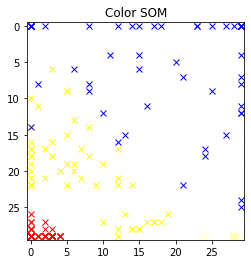

In [69]:
centroid_grid = [[] for i in range(n)]
weights = model.W
locations = model.locations
for i, loc in enumerate(locations):
    centroid_grid[loc[0]].append(weights[i].numpy())
    
mapped = model.map_vects(torch.Tensor(data))
#Plot
plt.imshow(image_grid)
plt.title('Color SOM')
for i, m in enumerate(mapped):
    plt.plot(m[1], m[0], 'x', color=colors[y[i]])
plt.show()

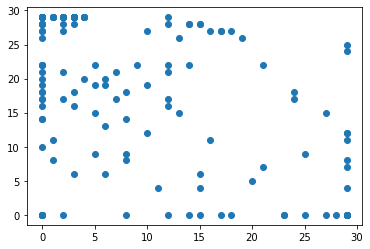

In [71]:
plt.scatter(np.array(mapped)[:, 1], np.array(mapped)[:, 0])